In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.MSMR({"number of MSMR reactions": ("6", "4")})
param = model.param
param_n = param.n.prim
param_p = param.p.prim
pv = pybamm.ParameterValues("MSMR_Example")

In [3]:
U_n = pybamm.linspace(0, 1.5, 1000)
U_p = pybamm.linspace(2.5, 4.5, 1000)
c_n_max = param_n.c_max
c_p_max = param_p.c_max
c_e = param.c_e_init
T = param.T_init

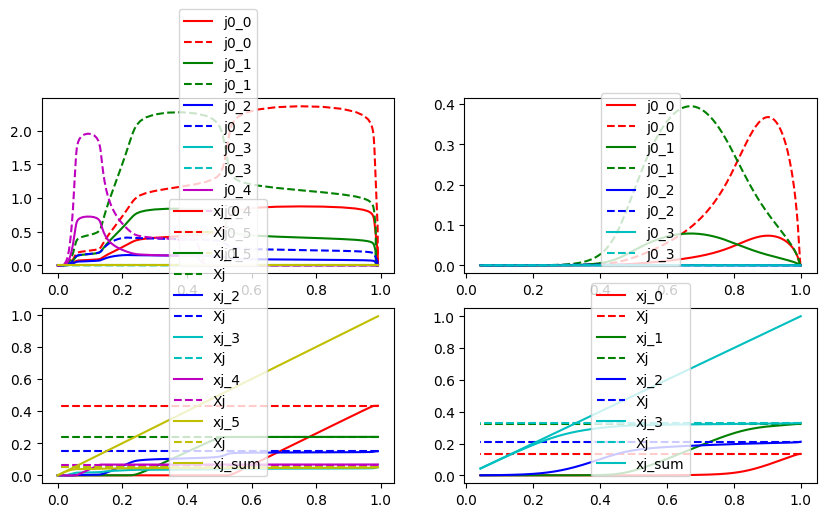

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))

x = param_n.x(U_n)
xj_sum = 0
color = ["r", "g", "b", "c", "m", "y"]
for i in range(6):
    wj = param_n.w_j(i)
    aj = param_n.alpha_bv_j(i)
    Xj = param_n.X_j(i)
    xj = param_n.x_j(U_n, i)
    xj_sum += xj
    j0j = xj ** (wj * aj) * (Xj - xj) ** (wj * (1 - aj))
    c_s = xj * c_n_max
    j0j_param = param_n.j0_j(c_e, c_s, T, i)
    ax[0, 0].plot(pv.evaluate(x), pv.evaluate(j0j), color=color[i], label=f"j0_{i}")
    ax[0, 0].plot(
        pv.evaluate(x), pv.evaluate(j0j_param), "--", color=color[i], label=f"j0_{i}"
    )
    ax[1, 0].plot(pv.evaluate(x), pv.evaluate(xj), color=color[i], label=f"xj_{i}")
    ax[1, 0].plot(
        pv.evaluate(x),
        np.ones_like(pv.evaluate(x)) * pv.evaluate(Xj),
        "--",
        color=color[i],
        label=f"Xj",
    )
ax[1, 0].plot(pv.evaluate(x), pv.evaluate(xj_sum), color=color[i], label=f"xj_sum")
ax[0, 0].legend()
ax[1, 0].legend()

x = param_p.x(U_p)
xj_sum = 0
for i in range(4):
    wj = param_p.w_j(i)
    aj = param_p.alpha_bv_j(i)
    Xj = param_p.X_j(i)
    xj = param_p.x_j(U_p, i)
    xj_sum += xj
    j0j = xj ** (wj * aj) * (Xj - xj) ** (wj * (1 - aj))
    c_s = xj * c_p_max
    j0j_param = param_p.j0_j(c_e, c_s, T, i)    
    ax[0, 1].plot(pv.evaluate(x), pv.evaluate(j0j), color=color[i], label=f"j0_{i}")
    ax[0, 1].plot(
        pv.evaluate(x), pv.evaluate(j0j_param), "--", color=color[i], label=f"j0_{i}"
    )
    ax[1, 1].plot(pv.evaluate(x), pv.evaluate(xj), color=color[i], label=f"xj_{i}")
    ax[1, 1].plot(
        pv.evaluate(x),
        np.ones_like(pv.evaluate(x)) * pv.evaluate(Xj),
        "--",
        color=color[i],
        label=f"Xj",
    )
ax[1, 1].plot(pv.evaluate(x), pv.evaluate(xj_sum), color=color[i], label=f"xj_sum")
ax[0, 1].legend()
ax[1, 1].legend()